# Introduction
This notebook is about performing analysis of COVID-19 cases and deaths in Virginia and its counties.

In [1]:
# Import Statements

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
# from mpldatacursor import datacursor
from matplotlib.dates import *

# Data Importation, Preparation, and Cleaning
First, we load the data and take a brief look at the first few rows.

Then we look at the data types; we realize that we need to change the data type of 'date' from 'object' to a datetime type. Then, we create a 'date2' variable that is a float version of the date.

Next, we check that the 'cases' and 'deaths' variables are cumulative, and not simply the number of cases and deaths for that day.

Finally, we declare two global variables: 'latest_date' and 'latest_row'.

In [2]:
# import data

url = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv"
data = pd.read_csv(url, sep=",")
# get a brief initial look at the data
data

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0
...,...,...,...,...,...,...
2405132,2022-04-13,Sweetwater,Wyoming,56037.0,11063,124.0
2405133,2022-04-13,Teton,Wyoming,56039.0,9945,16.0
2405134,2022-04-13,Uinta,Wyoming,56041.0,5624,39.0
2405135,2022-04-13,Washakie,Wyoming,56043.0,2356,43.0


In [3]:
# get an initial look at the data's types
display(data.dtypes)

date       object
county     object
state      object
fips      float64
cases       int64
deaths    float64
dtype: object

In [4]:
# convert date column from object type to datetime type
data["date"] = pd.to_datetime(data["date"], infer_datetime_format = True)
# convert date column from datetime type to the date format matplotlib uses
data["date2"] = mpl.dates.date2num(data["date"])
# check that the conversion of date column from object to datetime and datetime to float (for date2) went through correctly
display(data.dtypes)

date      datetime64[ns]
county            object
state             object
fips             float64
cases              int64
deaths           float64
date2            float64
dtype: object

In [5]:
# get the latest date in the dataset and look at it
latest_date = data["date2"].max()
# get the index of the latest row
latest_row = len(data) - 1
# print these global variables
print("Latest Date: " + str(latest_date))
print("Latest Row: " + str(latest_row))

Latest Date: 19095.0
Latest Row: 2405136


#  Virginia Analyses
First, we get just the data corresponding to the state of Virginia, and take a look at it.

Next, we get just the data corresponding to the latest date for the state of Virginia, and take a look at it.

Then, we make several plots to examine the data.

In [6]:
# start of Virginia Branch
# get all Virginia data
va_data = data[data["state"] == "Virginia"]
# get a look at the Virginia data
va_data

,date,county,state,fips,cases,deaths,date2
739,2020-03-07,Fairfax,Virginia,51059.0,1,0.0,18328.0
851,2020-03-08,Fairfax,Virginia,51059.0,2,0.0,18329.0
981,2020-03-09,Fairfax,Virginia,51059.0,4,0.0,18330.0
982,2020-03-09,Virginia Beach city,Virginia,51810.0,1,0.0,18330.0
1143,2020-03-10,Fairfax,Virginia,51059.0,4,0.0,18331.0
...,...,...,...,...,...,...,...
2404943,2022-04-13,Williamsburg city,Virginia,51830.0,1760,22.0,19095.0
2404944,2022-04-13,Winchester city,Virginia,51840.0,6318,79.0,19095.0
2404945,2022-04-13,Wise,Virginia,51195.0,10248,195.0,19095.0
2404946,2022-04-13,Wythe,Virginia,51197.0,7485,146.0,19095.0


In [7]:
# get the latest date's info for the Virginia dataset, and sort it by number of deaths
va_data_latest = va_data[va_data["date2"] == latest_date]
va_data_latest = va_data_latest.sort_values(by = "deaths")
# get a look at the latest date's data for Virginia
va_data_latest

,date,county,state,fips,cases,deaths,date2
2404875,2022-04-13,Highland,Virginia,51091.0,366,7.0,19095.0
2404918,2022-04-13,Rappahannock,Virginia,51157.0,996,10.0,19095.0
2404881,2022-04-13,King and Queen,Virginia,51097.0,1123,12.0,19095.0
2404854,2022-04-13,Falls Church city,Virginia,51610.0,2032,16.0,19095.0
2404844,2022-04-13,Craig,Virginia,51045.0,1119,18.0,19095.0
...,...,...,...,...,...,...,...
2404915,2022-04-13,Prince William,Virginia,51153.0,95254,736.0,19095.0
2404840,2022-04-13,Chesterfield,Virginia,51041.0,72922,754.0,19095.0
2404938,2022-04-13,Virginia Beach city,Virginia,51810.0,89590,813.0,19095.0
2404873,2022-04-13,Henrico,Virginia,51087.0,64837,920.0,19095.0


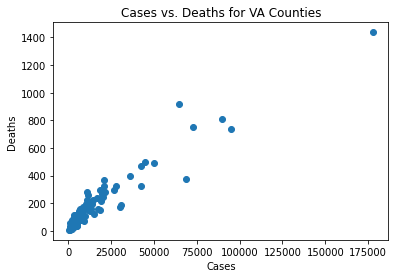

In [8]:
# create a scatter plot of cases vs. deaths for VA counties
plt.scatter('cases', 'deaths', data=va_data_latest)
plt.title("Cases vs. Deaths for VA Counties")
plt.xlabel("Cases")
plt.ylabel("Deaths")
plt.show()

In [9]:
# add a column for deaths per case to the data
va_data_latest['deaths_per_case'] = va_data_latest['deaths']/va_data_latest['cases']
va_data_latest

,date,county,state,fips,cases,deaths,date2,deaths_per_case
2404875,2022-04-13,Highland,Virginia,51091.0,366,7.0,19095.0,0.019126
2404918,2022-04-13,Rappahannock,Virginia,51157.0,996,10.0,19095.0,0.010040
2404881,2022-04-13,King and Queen,Virginia,51097.0,1123,12.0,19095.0,0.010686
2404854,2022-04-13,Falls Church city,Virginia,51610.0,2032,16.0,19095.0,0.007874
2404844,2022-04-13,Craig,Virginia,51045.0,1119,18.0,19095.0,0.016086
...,...,...,...,...,...,...,...,...
2404915,2022-04-13,Prince William,Virginia,51153.0,95254,736.0,19095.0,0.007727
2404840,2022-04-13,Chesterfield,Virginia,51041.0,72922,754.0,19095.0,0.010340
2404938,2022-04-13,Virginia Beach city,Virginia,51810.0,89590,813.0,19095.0,0.009075
2404873,2022-04-13,Henrico,Virginia,51087.0,64837,920.0,19095.0,0.014189


In [10]:
# get counties with many cases (at least 30,000 cases)
va_data_latest_many_cases = va_data_latest[va_data_latest["cases"] >= 30000]
va_data_latest_many_cases

,date,county,state,fips,cases,deaths,date2,deaths_per_case
2404932,2022-04-13,Stafford,Virginia,51179.0,30332,174.0,19095.0,0.005737
2404817,2022-04-13,Alexandria city,Virginia,51510.0,30655,185.0,19095.0,0.006035
2404822,2022-04-13,Arlington,Virginia,51013.0,42374,322.0,19095.0,0.007599
2404885,2022-04-13,Loudoun,Virginia,51107.0,68477,378.0,19095.0,0.005520
2404899,2022-04-13,Newport News city,Virginia,51700.0,36254,395.0,19095.0,0.010895
2404900,2022-04-13,Norfolk city,Virginia,51710.0,42246,470.0,19095.0,0.011125
2404839,2022-04-13,Chesapeake city,Virginia,51550.0,49995,489.0,19095.0,0.009781
2404920,2022-04-13,Richmond city,Virginia,51760.0,44788,500.0,19095.0,0.011164
2404915,2022-04-13,Prince William,Virginia,51153.0,95254,736.0,19095.0,0.007727
2404840,2022-04-13,Chesterfield,Virginia,51041.0,72922,754.0,19095.0,0.010340


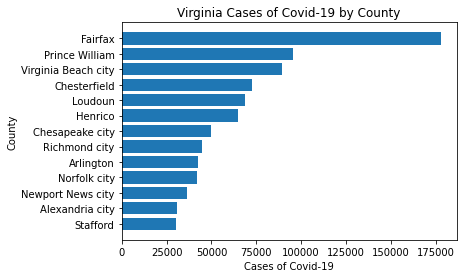

In [11]:
# Sort data by cases and then plot bar graph of cases by county
va_data_latest_many_cases = va_data_latest_many_cases.sort_values(by = "cases")
cases_data_va = va_data_latest_many_cases['cases'].to_numpy()
labels = va_data_latest_many_cases['county']
plt.yticks(range(len(cases_data_va)), labels)
plt.ylabel("County")
plt.xlabel("Cases of Covid-19")
plt.title("Virginia Cases of Covid-19 by County")
plt.barh(range(len(cases_data_va)), cases_data_va)
plt.show()

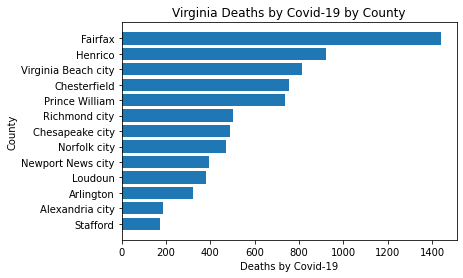

In [12]:
# Sort data by cases and then plot bar graph of deaths by county
va_data_latest_many_cases = va_data_latest_many_cases.sort_values(by = "deaths")
deaths_data_va = va_data_latest_many_cases['deaths'].to_numpy()
labels = va_data_latest_many_cases['county']
plt.yticks(range(len(deaths_data_va)), labels)
plt.ylabel("County")
plt.xlabel("Deaths by Covid-19")
plt.title("Virginia Deaths by Covid-19 by County")
plt.barh(range(len(deaths_data_va)), deaths_data_va)
plt.show()

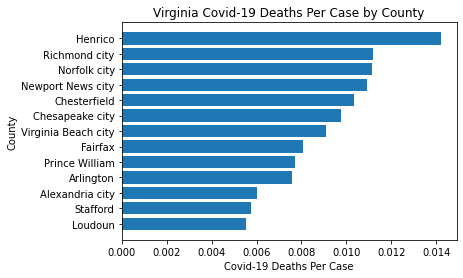

In [13]:
# Sort data by deaths per case and then plot bar graph of deaths per case by county
va_data_latest_many_cases = va_data_latest_many_cases.sort_values(by = "deaths_per_case")
deathspercase_data_va = va_data_latest_many_cases['deaths_per_case'].to_numpy()
labels = va_data_latest_many_cases['county']
plt.yticks(range(len(deathspercase_data_va)), labels)
plt.ylabel("County")
plt.xlabel("Covid-19 Deaths Per Case")
plt.title("Virginia Covid-19 Deaths Per Case by County")
plt.barh(range(len(deathspercase_data_va)), deathspercase_data_va)
plt.show()

## Virginia County Analyses
For county-level analyses, we picked two counties of interest: Fairfax and Henrico. Fairfax was chosen due to having the most deaths and cases, while Henrico was chosen due to having the highest Deaths Per Case for those counties with at least 30,000 cases.

For each of these counties, we plot the number of cases by date and the number of deaths by date; for number of deaths by date, we also predict how many deaths will happen in the coming months based on simple regression models.

### Fairfax County Analysis

In [14]:
# let's start by getting the fairfax data and taking a look at it.
fairfax_data = va_data[va_data["county"] == "Fairfax"]
fairfax_data

,date,county,state,fips,cases,deaths,date2
739,2020-03-07,Fairfax,Virginia,51059.0,1,0.0,18328.0
851,2020-03-08,Fairfax,Virginia,51059.0,2,0.0,18329.0
981,2020-03-09,Fairfax,Virginia,51059.0,4,0.0,18330.0
1143,2020-03-10,Fairfax,Virginia,51059.0,4,0.0,18331.0
1342,2020-03-11,Fairfax,Virginia,51059.0,4,0.0,18332.0
...,...,...,...,...,...,...,...
2391829,2022-04-09,Fairfax,Virginia,51059.0,176962,1438.0,19091.0
2395085,2022-04-10,Fairfax,Virginia,51059.0,176962,1438.0,19092.0
2398340,2022-04-11,Fairfax,Virginia,51059.0,177378,1439.0,19093.0
2401596,2022-04-12,Fairfax,Virginia,51059.0,177581,1439.0,19094.0


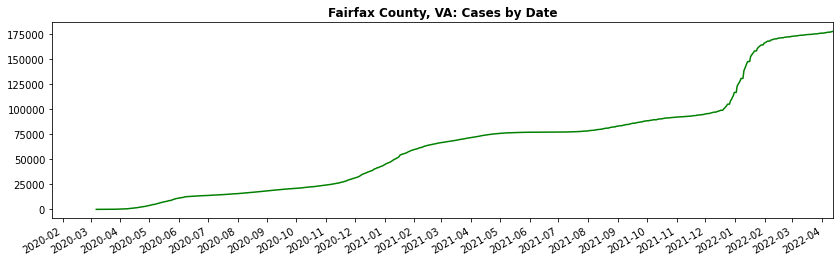

In [15]:
# plot line graph of cases by date for Fairfax
fig,ax = plt.subplots()
ax.plot_date(fairfax_data["date"], fairfax_data["cases"], 'g')
ax.set_xlim(pd.Timestamp(data['date'][0]), pd.Timestamp(data['date'][latest_row]))
ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter('%Y-%m'))
ax.fmt_xdata = DateFormatter('% Y-% m-% d')
fig.autofmt_xdate()
plt.title("Fairfax County, VA: Cases by Date", fontweight = "bold")
fig.set_figwidth(14)
plt.show()

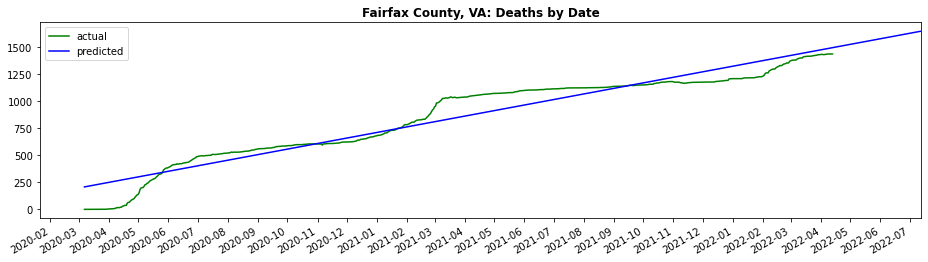

In [16]:
# plot line graph of deaths by date with predicted deaths using 1st degree polynomial, a.k.a. linear

fig,ax = plt.subplots()
ax.plot_date(fairfax_data["date"], fairfax_data["deaths"], 'g', label = 'actual')

# create dates list and append extra dates to make predictions on.
pred_dates = fairfax_data["date2"]
pred_dates = pred_dates.append(pd.Series([latest_date + 90]))

# create the linear regression model for prediction
trend = np.polyfit(fairfax_data["date2"], fairfax_data["deaths"], 1)
trendpoly = np.poly1d(trend)
# plot the predicted trendline
ax.plot(pred_dates, trendpoly(pred_dates), 'b', label = 'predicted')

ax.set_xlim(pd.Timestamp(data['date'][0]), pd.Timestamp(data['date'][latest_row]) + pd.tseries.offsets.DateOffset(months = 3))
ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter('%Y-%m'))
ax.fmt_xdata = DateFormatter('% Y-% m-% d')
fig.autofmt_xdate()
plt.title("Fairfax County, VA: Deaths by Date", fontweight = "bold")
fig.set_figwidth(15.8)
plt.legend()
plt.show()

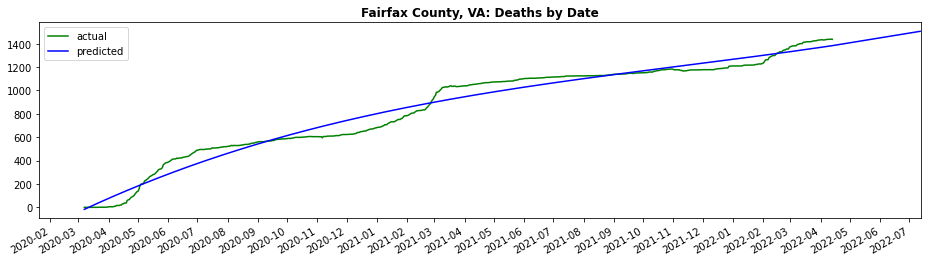

In [17]:
# plot line graph of deaths by date with predicted deaths using 3rd degree polynomial

fig,ax = plt.subplots()
ax.plot_date(fairfax_data["date"], fairfax_data["deaths"], 'g', label = 'actual')

# create dates list and append extra dates to make predictions on.
pred_dates = fairfax_data["date2"]
pred_dates = pred_dates.append(pd.Series([latest_date + 90]))

# create the linear regression model for prediction
trend = np.polyfit(fairfax_data["date2"], fairfax_data["deaths"], 3)
trendpoly = np.poly1d(trend)
# plot the predicted trendline
ax.plot(pred_dates, trendpoly(pred_dates), 'b', label = 'predicted')

ax.set_xlim(pd.Timestamp(data['date'][0]), pd.Timestamp(data['date'][latest_row]) + pd.tseries.offsets.DateOffset(months = 3))
ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter('%Y-%m'))
ax.fmt_xdata = DateFormatter('% Y-% m-% d')
fig.autofmt_xdate()
plt.title("Fairfax County, VA: Deaths by Date", fontweight = "bold")
fig.set_figwidth(15.8)
plt.legend()
plt.show()

### Henrico County Analysis

In [18]:
# let's start by getting the henrico data and taking a look at it.
henrico_data = va_data[va_data["county"] == "Henrico"]
henrico_data

,date,county,state,fips,cases,deaths,date2
3711,2020-03-17,Henrico,Virginia,51087.0,2,0.0,18338.0
4344,2020-03-18,Henrico,Virginia,51087.0,2,0.0,18339.0
5100,2020-03-19,Henrico,Virginia,51087.0,2,0.0,18340.0
5998,2020-03-20,Henrico,Virginia,51087.0,3,0.0,18341.0
7026,2020-03-21,Henrico,Virginia,51087.0,7,0.0,18342.0
...,...,...,...,...,...,...,...
2391850,2022-04-09,Henrico,Virginia,51087.0,64579,916.0,19091.0
2395106,2022-04-10,Henrico,Virginia,51087.0,64579,916.0,19092.0
2398361,2022-04-11,Henrico,Virginia,51087.0,64760,917.0,19093.0
2401617,2022-04-12,Henrico,Virginia,51087.0,64812,919.0,19094.0


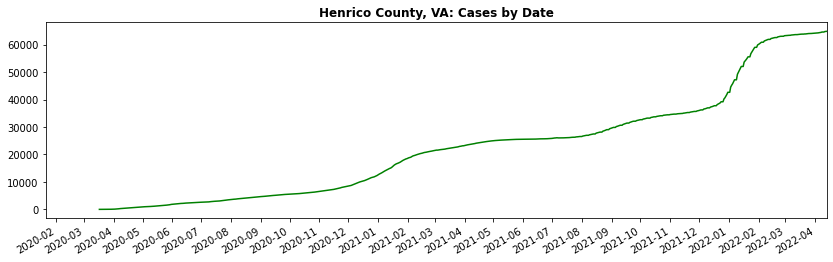

In [19]:
# plot line graph of cases by date for Fairfax
fig,ax = plt.subplots()
ax.plot_date(henrico_data["date"], henrico_data["cases"], 'g')
ax.set_xlim(pd.Timestamp(data['date'][0]), pd.Timestamp(data['date'][latest_row]))
ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter('%Y-%m'))
ax.fmt_xdata = DateFormatter('% Y-% m-% d')
fig.autofmt_xdate()
plt.title("Henrico County, VA: Cases by Date", fontweight = "bold")
fig.set_figwidth(14)
plt.show()

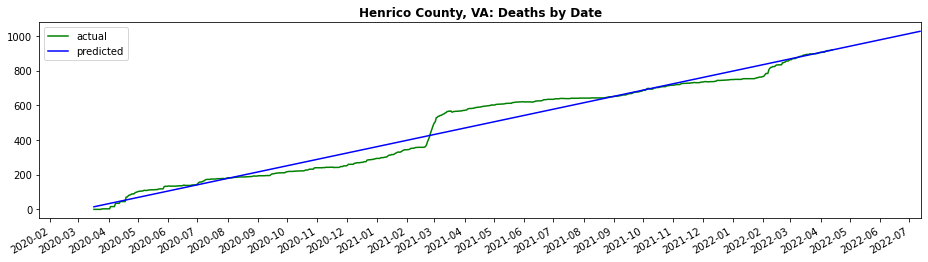

In [20]:
# plot line graph of deaths by date with predicted deaths using 1st degree polynomial, a.k.a. linear

fig,ax = plt.subplots()
ax.plot_date(henrico_data["date"], henrico_data["deaths"], 'g', label = 'actual')

# create dates list and append extra dates to make predictions on.
pred_dates = henrico_data["date2"]
pred_dates = pred_dates.append(pd.Series([latest_date + 90]))

# create the linear regression model for prediction
trend = np.polyfit(henrico_data["date2"], henrico_data["deaths"], 1)
trendpoly = np.poly1d(trend)
# plot the predicted trendline
ax.plot(pred_dates, trendpoly(pred_dates), 'b', label = 'predicted')

ax.set_xlim(pd.Timestamp(data['date'][0]), pd.Timestamp(data['date'][latest_row]) + pd.tseries.offsets.DateOffset(months = 3))
ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter('%Y-%m'))
ax.fmt_xdata = DateFormatter('% Y-% m-% d')
fig.autofmt_xdate()
plt.title("Henrico County, VA: Deaths by Date", fontweight = "bold")
fig.set_figwidth(15.8)
plt.legend()
plt.show()

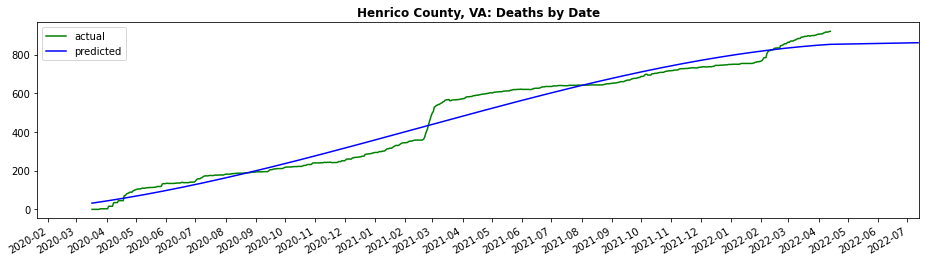

In [21]:
# plot line graph of deaths by date with predicted deaths using 3rd degree polynomial

fig,ax = plt.subplots()
ax.plot_date(henrico_data["date"], henrico_data["deaths"], 'g', label = 'actual')

# create dates list and append extra dates to make predictions on.
pred_dates = henrico_data["date2"]
pred_dates = pred_dates.append(pd.Series([latest_date + 90]))

# create the linear regression model for prediction
trend = np.polyfit(henrico_data["date2"], henrico_data["deaths"], 3)
trendpoly = np.poly1d(trend)
# plot the predicted trendline
ax.plot(pred_dates, trendpoly(pred_dates), 'b', label = 'predicted')

ax.set_xlim(pd.Timestamp(data['date'][0]), pd.Timestamp(data['date'][latest_row]) + pd.tseries.offsets.DateOffset(months = 3))
ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter('%Y-%m'))
ax.fmt_xdata = DateFormatter('% Y-% m-% d')
fig.autofmt_xdate()
plt.title("Henrico County, VA: Deaths by Date", fontweight = "bold")
fig.set_figwidth(15.8)
plt.legend()
plt.show()

# Conclusion
We have analyzed data about cases and deaths of Covid-19 in Virginia and two of its counties: Fairfax and Henrico. We have also attempted to predict future deaths from Covid-19 for each of these counties.